#  How much do guests pay for a room per night?
#  How does the price per night vary over the year?

In [10]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

In [2]:
file_to_load = "Resources/hotel_bookings.csv"
# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

In [4]:
#Checking missing values
purchase_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
#Country, agent, and company have missing values. Fill data with 0s. 
clean_purchase_data = purchase_data.fillna(value=0)

How much do guests pay for a room per night?

In [15]:
#get non cancel reserv
clean_data_NCancel=clean_purchase_data.loc[clean_purchase_data['is_canceled']==0]
clean_data_NCancel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,all_child
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,0.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,0.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,0.0


In [52]:
avg_ADR=clean_data_NCancel['adr'].mean()
avg_ADR

99.9876929728839

In [26]:
by_distChannel = clean_data_NCancel['distribution_channel'].value_counts()
by_distChannel

TA/TO        57718
Direct       12088
Corporate     5203
GDS            156
Undefined        1
Name: distribution_channel, dtype: int64

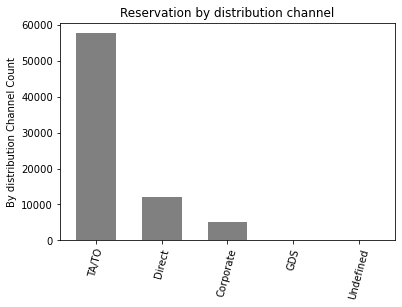

In [46]:
DistChannel_plot = by_distChannel.plot(kind='bar', rot=75, color = "gray", title="Reservation by distribution channel", width= .6)

DistChannel_plot.set_ylabel("By distribution Channel Count")
plt.show()

In [30]:
df_By_distriChan = clean_data_NCancel.groupby(['distribution_channel'])
df_By_distriChan

In [38]:
df_By_distriChan['adr'].describe().head()

,count,mean,std,min,25%,50%,75%,max
distribution_channel,,,,,,,,
Corporate,5203.0,67.247982,32.794041,0.00,42.00,65.0,89.00,508.0
Direct,12088.0,106.038609,61.842170,-6.38,65.16,96.0,141.00,451.5
GDS,156.0,119.933462,42.500997,0.00,91.50,111.5,149.25,209.0
TA/TO,57718.0,101.617635,46.287003,0.00,71.97,95.0,125.10,510.0
Undefined,1.0,112.700000,NaN,112.70,112.70,112.7,112.70,112.7


In [44]:
Forplot_ADRbyDistr = df_By_distriChan['adr'].mean()
Forplot_ADRbyDistr 

distribution_channel
Corporate     67.247982
Direct       106.038609
GDS          119.933462
TA/TO        101.617635
Undefined    112.700000
Name: adr, dtype: float64

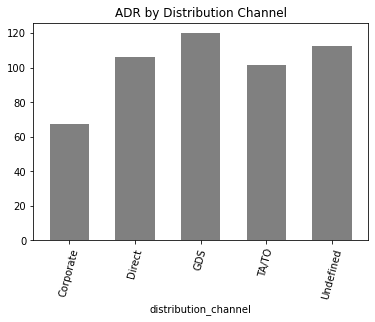

In [43]:


DistChannelADR_plot = Forplot_ADRbyDistr.plot(kind='bar', rot=75, color = "gray", title="ADR by Distribution Channel", width= .6)

DistChannel_plot.set_ylabel("By distribution Channel Count")
plt.show()

#  How does the price per night vary over the year?

In [57]:
df_By_month= clean_data_NCancel.groupby(['arrival_date_month'])
df_By_month

In [58]:
df_By_month['adr'].describe().head()

,count,mean,std,min,25%,50%,75%,max
arrival_date_month,,,,,,,,
April,6565.0,97.877849,39.839278,0.0,74.45,95.00,118.25,336.00
August,8638.0,142.088795,60.636553,0.0,99.00,131.75,179.10,426.25
December,4409.0,78.920238,46.628637,0.0,52.00,72.07,95.70,451.50
February,5372.0,72.419429,31.569510,0.0,51.00,73.53,88.00,284.20
January,4122.0,67.001050,29.782005,0.0,45.00,66.00,85.00,284.20


In [63]:
Forplot_ADRbyMonth = df_By_month['adr'].mean()
Forplot_ADRbyMonth 

arrival_date_month
April         97.877849
August       142.088795
December      78.920238
February      72.419429
January       67.001050
July         129.253758
June         114.589636
March         77.331574
May          104.842342
November      70.505169
October       86.830198
September    107.277159
Name: adr, dtype: float64

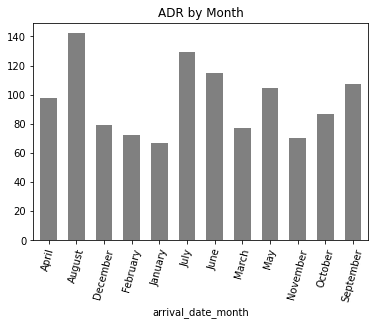

In [65]:

MonthADR_plot = Forplot_ADRbyMonth.plot(kind='bar', rot=75, color = "gray", title="ADR by Month", width= .6)

DistChannel_plot.set_ylabel("By Mounth")
plt.show()

By Hotel type

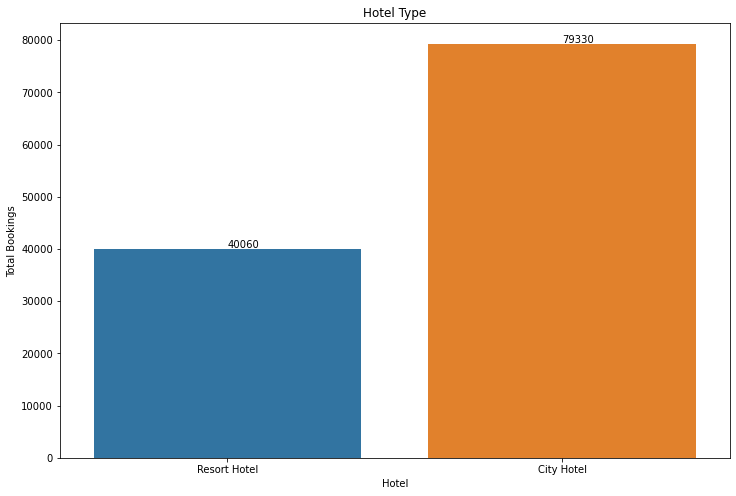

In [11]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="hotel", data = purchase_data)
plt.title('Hotel Type')
plt.xlabel('Hotel')
plt.ylabel('Total Bookings')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.4 , p.get_height()+100)) 

How much do guests pay for a room per night?

In [ ]:
# grab data:
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

In [8]:
clean_purchase_data['all_child'] = clean_purchase_data['children'] + clean_purchase_data['babies']
pd.crosstab(clean_purchase_data['adults'], clean_purchase_data['all_child'], margins=True, margins_name = 'Total')

all_child,0.0,1.0,2.0,3.0,9.0,10.0,Total
adults,,,,,,,
0,180,4,205,14,0,0,403
1,22577,286,157,6,1,0,23027
2,81560,4658,3369,91,0,2,89680
3,5666,495,41,0,0,0,6202
4,59,3,0,0,0,0,62
5,2,0,0,0,0,0,2
6,1,0,0,0,0,0,1
10,1,0,0,0,0,0,1
20,2,0,0,0,0,0,2
